# August 27 - Training on 9M event dataset

In [1]:
# Default imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch
from plot_utils import notebook_utils_2

## Printing the performance of the VAEs ( latest model )

In [2]:
latent_dims = [16, 32, 64, 128, 256]
dumps = ["20190827_010858", "20190827_011114", "20190827_011238", "20190827_011334", "20190827_011503"]

# Metrics for plotting
train_mse_loss, train_kl_loss, train_mse_std, train_kl_std = [], [], [], []
val_mse_loss, val_kl_loss, val_mse_std, val_kl_std = [], [], [], []
    
# Print the metrics and add to the lists to plot
for latent_dim, dump in zip(latent_dims, dumps):
    print("\n---------------------------\nVAE with {0} latent dimensions :\n---------------------------\n".format(latent_dim))
    vae_metrics = notebook_utils_2.print_vae_metrics(dump)
    
    # Add values to the train subset plotting lists
    train_mse_loss.append(vae_metrics[0])
    train_kl_loss.append(vae_metrics[1])
    train_mse_std.append(vae_metrics[2])
    train_kl_std.append(vae_metrics[3])
    
    # Add values to the val subset plotting lists
    val_mse_loss.append(vae_metrics[4])
    val_kl_loss.append(vae_metrics[5])
    val_mse_std.append(vae_metrics[6])
    val_kl_std.append(vae_metrics[7])


---------------------------
VAE with 16 latent dimensions :
---------------------------

Printing metrics over the training subset :
Average total loss : 9023.308119014982
Average mse loss : 8968.743130864703
Average kl loss : 54.56498957793095


Printing metrics over the validation subset :
Average total loss : 9042.023488658315
Average mse loss : 8987.427880084282
Average kl loss : 54.59559979954442

---------------------------
VAE with 32 latent dimensions :
---------------------------

Printing metrics over the training subset :
Average total loss : 8890.287769296656
Average mse loss : 8836.398625038255
Average kl loss : 53.889142080010245


Printing metrics over the validation subset :
Average total loss : 8908.273088243735
Average mse loss : 8854.367468895216
Average kl loss : 53.905632337129845

---------------------------
VAE with 64 latent dimensions :
---------------------------

Printing metrics over the training subset :
Average total loss : 8903.214611638146
Average mse l

## Plot the metrics collected from the log above

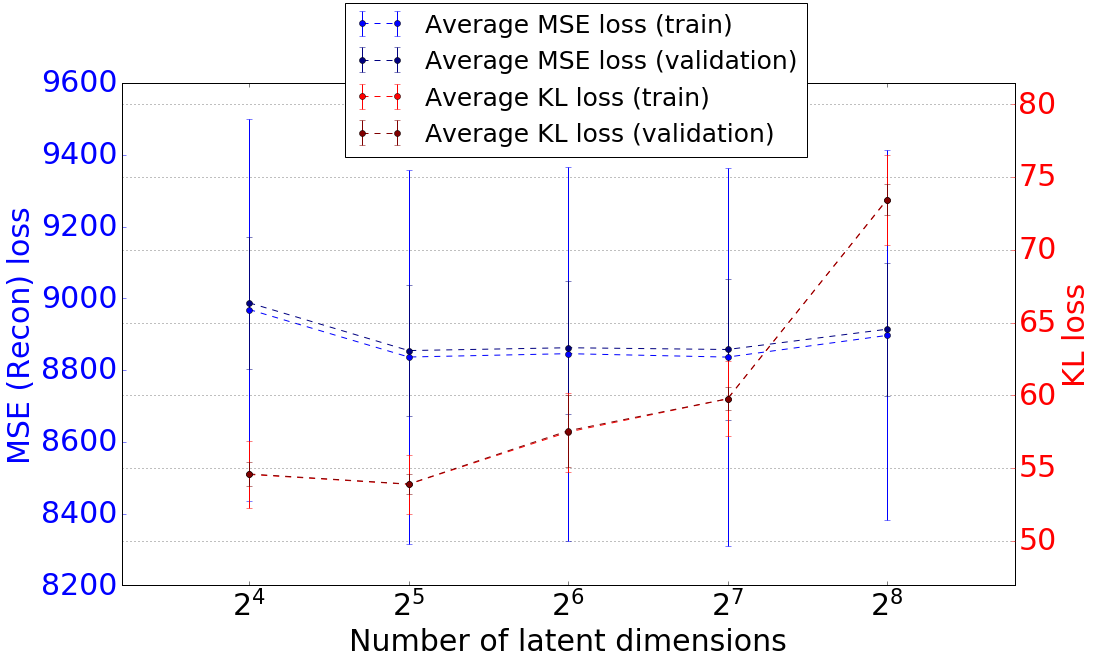

In [15]:
# Plot the metrics for the training subset

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(16,9))

# Set the x-axes ticks for the plot
ax1.set_xticks(latent_dims)

# Use the same x-axis to plot the KL loss
ax2 = ax1.twinx()

# Plot the MSE values collected above
ax1.errorbar(latent_dims, train_mse_loss, yerr=train_mse_std, linestyle='dashed', marker='o',
             color="blue", label="Average MSE loss (train)")
ax1.errorbar(latent_dims, val_mse_loss, yerr=val_mse_std, linestyle='dashed', marker='o',
             color="navy", label="Average MSE loss (validation)")

# Plot the KL values collected above
ax2.errorbar(latent_dims, train_kl_loss, yerr=train_kl_std, linestyle='dashed', marker='o',
             color="red", label="Average KL loss (train)")
ax2.errorbar(latent_dims, val_kl_loss, yerr=val_kl_std, linestyle='dashed', marker='o',
             color="maroon", label="Average KL loss (validation)")

# Setup plot characteristics
ax1.tick_params(axis="x", labelsize=30)
ax1.set_xlabel("Number of latent dimensions", fontsize=30)
ax1.set_xscale("log", basex=2)

ax1.set_ylabel("MSE (Recon) loss", fontsize=30, color="blue")
ax1.tick_params(axis="y", labelsize=30, colors="blue")

ax2.set_ylabel("KL loss", fontsize=30, color="red")
ax2.tick_params(axis="y", labelsize=30, colors="red")

plt.margins(0.2)
plt.grid(True)

lgd = fig.legend(prop={"size":25}, loc='center', bbox_to_anchor=(0.5, 0.9))

## Printing the performance of the VAEs ( best model )

In [18]:
latent_dims = [16, 32, 64, 128, 256]
dumps = ["20190827_185834", "20190827_185735", "20190827_185623", "20190827_185343", "20190827_185246"]

# Metrics for plotting
train_mse_loss, train_kl_loss, train_mse_std, train_kl_std = [], [], [], []
val_mse_loss, val_kl_loss, val_mse_std, val_kl_std = [], [], [], []

for latent_dim, dump in zip(latent_dims, dumps):
    print("\n---------------------------\nVAE with {0} latent dimensions :\n---------------------------\n".format(latent_dim))
    vae_metrics = notebook_utils_2.print_vae_metrics(dump)
    
    # Add values to the train subset plotting lists
    train_mse_loss.append(vae_metrics[0])
    train_kl_loss.append(vae_metrics[1])
    train_mse_std.append(vae_metrics[2])
    train_kl_std.append(vae_metrics[3])
    
    # Add values to the val subset plotting lists
    val_mse_loss.append(vae_metrics[4])
    val_kl_loss.append(vae_metrics[5])
    val_mse_std.append(vae_metrics[6])
    val_kl_std.append(vae_metrics[7])


---------------------------
VAE with 16 latent dimensions :
---------------------------

Printing metrics over the training subset :
Average total loss : 9009.019903676286
Average mse loss : 8954.687327402075
Average kl loss : 54.33257676116554


Printing metrics over the validation subset :
Average total loss : 9026.575666914578
Average mse loss : 8972.211373506832
Average kl loss : 54.36427476879271

---------------------------
VAE with 32 latent dimensions :
---------------------------

Printing metrics over the training subset :
Average total loss : 8903.441232982568
Average mse loss : 8849.313970766521
Average kl loss : 54.127262703514866


Printing metrics over the validation subset :
Average total loss : 8921.91177235877
Average mse loss : 8867.769488994305
Average kl loss : 54.14227476423691

---------------------------
VAE with 64 latent dimensions :
---------------------------

Printing metrics over the training subset :
Average total loss : 8804.176848895693
Average mse los

## Plot the metrics from the log collected above

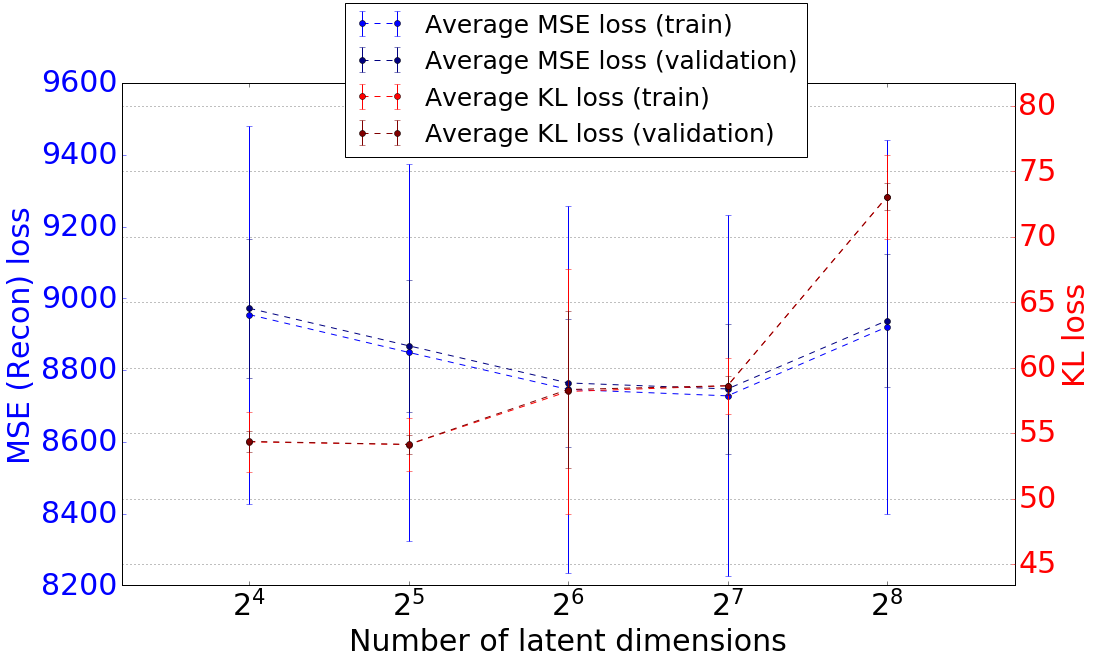

In [19]:
# Plot the metrics for the training subset

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(16,9))

# Set the x-axes ticks for the plot
ax1.set_xticks(latent_dims)

# Use the same x-axis to plot the KL loss
ax2 = ax1.twinx()

# Plot the MSE values collected above
ax1.errorbar(latent_dims, train_mse_loss, yerr=train_mse_std, linestyle='dashed', marker='o',
             color="blue", label="Average MSE loss (train)")
ax1.errorbar(latent_dims, val_mse_loss, yerr=val_mse_std, linestyle='dashed', marker='o',
             color="navy", label="Average MSE loss (validation)")

# Plot the KL values collected above
ax2.errorbar(latent_dims, train_kl_loss, yerr=train_kl_std, linestyle='dashed', marker='o',
             color="red", label="Average KL loss (train)")
ax2.errorbar(latent_dims, val_kl_loss, yerr=val_kl_std, linestyle='dashed', marker='o',
             color="maroon", label="Average KL loss (validation)")

# Setup plot characteristics
ax1.tick_params(axis="x", labelsize=30)
ax1.set_xlabel("Number of latent dimensions", fontsize=30)
ax1.set_xscale("log", basex=2)

ax1.set_ylabel("MSE (Recon) loss", fontsize=30, color="blue")
ax1.tick_params(axis="y", labelsize=30, colors="blue")

ax2.set_ylabel("KL loss", fontsize=30, color="red")
ax2.tick_params(axis="y", labelsize=30, colors="red")

plt.margins(0.2)
plt.grid(True)

lgd = fig.legend(prop={"size":25}, loc='center', bbox_to_anchor=(0.5, 0.9))